In [1]:
import pandas as pd
import numpy as np
import datetime
import math

from mpl_toolkits.mplot3d import axes3d
from matplotlib import pyplot
import matplotlib.pyplot as plt
from matplotlib import cm

from Helpers import make_3Dfunction_plot
from Supply import WindSupply
from Supply import WindSupplyDummy
from Demand import Households
from Demand import HouseholdsDummy
from Storage import TrainTrack
from Controller import Controller

# Demand

               Start time            End time     E1A  E1B  E1C  E2A  E2B  \
0     2019-01-01 00:00:00 2019-01-01 00:15:00  498.54  0.0  0.0  0.0  0.0   
1     2019-01-01 00:15:00 2019-01-01 00:30:00  494.48  0.0  0.0  0.0  0.0   
2     2019-01-01 00:30:00 2019-01-01 00:45:00  490.56  0.0  0.0  0.0  0.0   
3     2019-01-01 00:45:00 2019-01-01 01:00:00  483.56  0.0  0.0  0.0  0.0   
4     2019-01-01 01:00:00 2019-01-01 01:15:00  471.38  0.0  0.0  0.0  0.0   
...                   ...                 ...     ...  ...  ...  ...  ...   
35035 2019-12-31 22:45:00 2019-12-31 23:00:00  517.58  0.0  0.0  0.0  0.0   
35036 2019-12-31 23:00:00 2019-12-31 23:15:00  502.04  0.0  0.0  0.0  0.0   
35037 2019-12-31 23:15:00 2019-12-31 23:30:00  497.00  0.0  0.0  0.0  0.0   
35038 2019-12-31 23:30:00 2019-12-31 23:45:00  494.34  0.0  0.0  0.0  0.0   
35039 2019-12-31 23:45:00 2020-01-01 00:00:00  500.92  0.0  0.0  0.0  0.0   

       E3A  E3B  E3C  E3D  E4A     Seconds        Days  
0      0.0  0.0  0

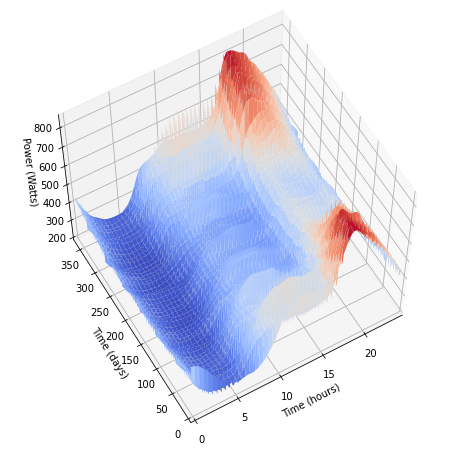

In [2]:
households = Households()
#print(households.data.head(100))
print(households.data)
#print(households.consumption(1400, 300))
make_3Dfunction_plot(households.consumption, zlabel = "Power (Watts)")

# Supply

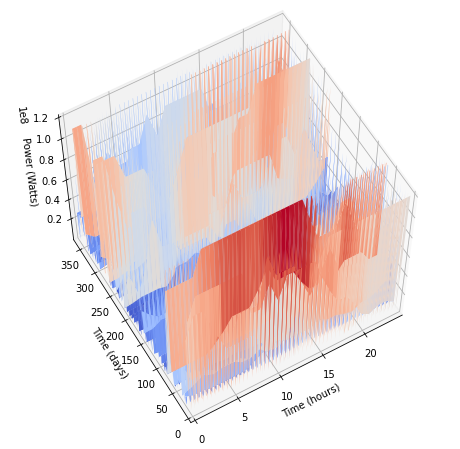

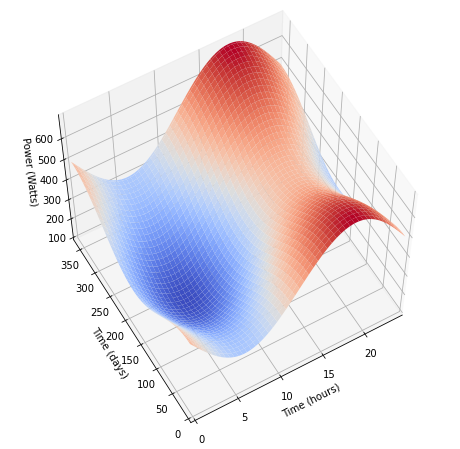

In [3]:
wind_supply = WindSupply()
make_3Dfunction_plot(wind_supply.output, zlabel = "Power (Watts)")

wind_supply = WindSupplyDummy()
make_3Dfunction_plot(wind_supply.output, zlabel = "Power (Watts)")

# Storage

In [4]:
train_track = TrainTrack()
time = 0
train_track.carts_on_track.append(train_track.track_length-1000)

for i in range(10):
    print(time, train_track.return_data())
    train_track.do_tick(1)
    time = time + 1

print("\n Adding a generator force. \n")
train_track.force_of_generator = -(train_track.get_gravity() + train_track.get_friction())#142978

for i in range(20):
    print(time, train_track.return_data())
    train_track.do_tick(1)
    time = time + 1

print("\n Adding another cart. \n")
train_track.add_cart("Top")
#train_track.force_of_generator = -(train_track.get_gravity() + train_track.get_friction())

for i in range(20):
    print(time, train_track.return_data())
    train_track.do_tick(1)
    time = time + 1

print("\n Now trying to decelerate. \n")
train_track.force_of_generator = -1.4 * (train_track.get_gravity() + train_track.get_friction())#142978

for i in range(20):
    print(time, train_track.return_data())
    train_track.do_tick(1)
    time = time + 1

print("\n Running until at the bottom. \n")
train_track.force_of_generator = - (train_track.get_gravity() + train_track.get_friction())

print(time, train_track.return_data())
for i in range(2050):
    #print(time, train_track.return_data())
    train_track.do_tick(1)
    time = time + 1
print(time, train_track.return_data())

print("\n Removing a cart. \n")
train_track.remove_cart(1, 0)
train_track.force_of_generator = - (train_track.get_gravity() + train_track.get_friction())

for i in range(20):
    print(time, train_track.return_data())
    train_track.do_tick(1)
    time = time + 1

print("\n Adding another cart. \n")
train_track.add_cart("Top")
train_track.force_of_generator = -(train_track.get_gravity() + train_track.get_friction())

for i in range(20):
    print(time, train_track.return_data())
    train_track.do_tick(1)
    time = time + 1

print("\n Removing and adding a cart. \n")
train_track.remove_cart(1, 0)
train_track.add_cart("Top")

for i in range(20):
    print(time, train_track.return_data())
    train_track.do_tick(1)
    time = time + 1


0 {'Positions': array([19099.75]), 'Velocity': 0, 'Forces (gravity, friction, generator)': [-163134.0, 0.0, 0], 'Power': 0.0, 'Other carts': {'Bottom': 150, 'Top': 150}, 'Losses (friction, efficiency)': array([0, 0])}
1 {'Positions': array([19099.26]), 'Velocity': -0.98, 'Forces (gravity, friction, generator)': [-163134.0, 4902.0, 0], 'Power': 0.0, 'Other carts': {'Bottom': 150, 'Top': 150}, 'Losses (friction, efficiency)': array([0., 0.])}
2 {'Positions': array([19097.81]), 'Velocity': -1.92, 'Forces (gravity, friction, generator)': [-163134.0, 4925.0, 0], 'Power': 0.0, 'Other carts': {'Bottom': 150, 'Top': 150}, 'Losses (friction, efficiency)': array([4785.1,    0. ])}
3 {'Positions': array([19095.42]), 'Velocity': -2.87, 'Forces (gravity, friction, generator)': [-163134.0, 4964.0, 0], 'Power': 0.0, 'Other carts': {'Bottom': 150, 'Top': 150}, 'Losses (friction, efficiency)': array([9471.,    0.])}
4 {'Positions': array([19092.07]), 'Velocity': -3.82, 'Forces (gravity, friction, gener

# Controller

In [ ]:
households = Households()
wind_supply = WindSupplyDummy()

def get_difference(time_seconds, time_days = 0, output = households, inputt  = wind_supply):
    return output.consumption(time_seconds, time_days) - inputt.output(time_seconds, time_days)

make_3Dfunction_plot(get_difference)

In [ ]:
train_track = TrainTrack(carts = 0)
supply = WindSupply()
demand = Households(amount_of_households_per_type = [125000, 0, 0, 0, 0, 0, 0, 0, 0, 0])# Theoretically 125000
controller = Controller(train_track = train_track, supply = supply, demand = demand, delta_time = 120)

make_3Dfunction_plot(controller.get_sastisfaction_supply_demand, zlabel = "Satisfaction")

data = pd.DataFrame(controller.data)
print(data.sum())

plt.plot(data["Time"] / (3600 * 24), data["Satisfaction"])
plt.xlabel("Time (days)")
plt.ylabel("Satisfaction")
plt.show()

In [ ]:
controller = Controller()

controller.simulate(200)

data = pd.DataFrame(controller.data)

print(data)

# Actual Simulation

In [ ]:
### SETTINGS
days_to_simulate = 364
amount_of_carts = 30000
amount_households = 67000
amount_windmils = 60

train_track = TrainTrack(carts = amount_of_carts/2)
supply = WindSupply(amount_of_windmills = amount_windmils)#WindSupplyDummy(100000)
demand = Households(amount_of_households_per_type = [amount_households, 0, 0, 0, 0, 0, 0, 0, 0, 0])# Theoretically 125000
controller = Controller(train_track = train_track, supply = supply, demand = demand, delta_time = 10)


### SIMULATION AND PLOTTING
#make_3Dfunction_plot(controller.get_difference_supply_demand, amount_of_days = days_to_simulate, zlabel = "Difference in power (Watts)")
#make_3Dfunction_plot(controller.get_sastisfaction_supply_demand, amount_of_days = days_to_simulate, zlabel = "Satisfaction")
controller.simulate(3600)# First simulate a hour to stabalize the stystem. This will cause the end result to have a constant first hour.
make_3Dfunction_plot(controller.simulate, amount_of_days = days_to_simulate, zlabel = "Difference in power (Watts)", title = "Difference plot " +str(days_to_simulate) + " days, "+ str(amount_households) + " households and " + str(amount_of_carts) + " carts.")

data = pd.DataFrame(controller.data)
#data.to_csv(str(days_to_simulate) + "days" + str(amount_households) + "households" + str(amount_of_carts) + "carts.csv")
#data = pd.read_csv("364days62500households10000000carts.csv")
data = data.iloc[360:]# Drop the first 360 rows (1 hour) of the data
print(data)

plt.figure(figsize = (8,8))
plt.plot(data["Time"] / (3600 * 24), data["Supply"], label="Supply")
plt.plot(data["Time"] / (3600 * 24), data["Demand"], label="Demand")
plt.xlabel("Time (days)")
plt.ylabel("Supply (Watts)")
plt.legend(loc="upper left")
plt.show()

plt.figure(figsize = (8,8))
plt.plot(data["Time"] / (3600 * 24), data["Satisfaction"])
plt.xlabel("Time (days)")
plt.ylabel("Satisfaction")
plt.show()

plt.figure(figsize = (8,8))
plt.plot(data["Time"] / (3600 * 24), data["Velocity"])
plt.xlabel("Time (days)")
plt.ylabel("Velocity on track (meter per second)")
plt.show()

plt.figure(figsize = (8,8))
plt.plot(data["Time"] / (3600 * 24), data["Amount carts on top"], label = "Amount of carts at top")
plt.plot(data["Time"] / (3600 * 24), data["Amount carts on bottom"], label = "Amount of carts at bottom")
plt.xlabel("Time (days)")
plt.ylabel("Amount of carts")
plt.legend(loc="upper left")
plt.show()


### Doing another simulation
train_track = TrainTrack(carts = amount_of_carts/2)
supply = WindSupply(amount_of_windmills = amount_windmils)#WindSupplyDummy(100000)
demand = Households(amount_of_households_per_type = [amount_households, 0, 0, 0, 0, 0, 0, 0, 0, 0])# Theoretically 125000
controller = Controller(train_track = train_track, supply = supply, demand = demand, delta_time = 10)
controller.simulate(3600)# First simulate a hour to stabalize the stystem. This will cause the end result to have a constant first hour.

make_3Dfunction_plot(controller.get_sastisfaction_supply_demand, zlabel = "Satisfaction")

In [ ]:
data.to_csv(str(days_to_simulate) + "days" + str(amount_households) + "households" + str(amount_of_carts) + "carts.csv")
#data = pd.read_csv("364days67000households10000000carts.csv")

data = pd.DataFrame(controller.data)
print("Carts off track at end of year", data["Amount carts on bottom"][-1], data["Amount carts on top"][-1])
print("Check if total energy stays the same (result should be around 1):", (np.sum(data["Demand"]) + np.sum(data["Losses"])) / np.sum(data["Supply"]))
print("Total efficiency :", 1 - (np.sum(data["Losses"])) / np.sum(data["Supply"]))

## Other simulations
Simulations for other graphs in the report.

### 125000 Households

In [ ]:
### SETTINGS
days_to_simulate = 364
amount_of_carts = 125000
amount_households = 67000
amount_windmils = 60

train_track = TrainTrack(carts = amount_of_carts/2)
supply = WindSupply(amount_of_windmills = amount_windmils)#WindSupplyDummy(100000)
demand = Households(amount_of_households_per_type = [amount_households, 0, 0, 0, 0, 0, 0, 0, 0, 0])# Theoretically 125000
controller = Controller(train_track = train_track, supply = supply, demand = demand, delta_time = 10)


### SIMULATION AND PLOTTING
#make_3Dfunction_plot(controller.get_difference_supply_demand, amount_of_days = days_to_simulate, zlabel = "Difference in power (Watts)")
#make_3Dfunction_plot(controller.get_sastisfaction_supply_demand, amount_of_days = days_to_simulate, zlabel = "Satisfaction")
controller.simulate(3600)# First simulate a hour to stabalize the stystem. This will cause the end result to have a constant first hour.
#make_3Dfunction_plot(controller.simulate, amount_of_days = days_to_simulate, zlabel = "Difference in power (Watts)", title = "Difference plot " +str(days_to_simulate) + " days, "+ str(amount_households) + " households and " + str(amount_of_carts) + " carts.")

#data = pd.DataFrame(controller.data)
#data.to_csv(str(days_to_simulate) + "days" + str(amount_households) + "households" + str(amount_of_carts) + "carts.csv")
data = pd.read_csv("364days125000households10000000carts.csv")
data = data.iloc[360:]# Drop the first 360 rows (1 hour) of the data
print(data)

plt.figure(figsize = (8,8))
plt.plot(data["Time"] / (3600 * 24), data["Supply"], label="Supply")
plt.plot(data["Time"] / (3600 * 24), data["Demand"], label="Demand")
plt.xlabel("Time (days)")
plt.ylabel("Supply (Watts)")
plt.legend(loc="upper left")
plt.show()

plt.figure(figsize = (8,8))
plt.plot(data["Time"] / (3600 * 24), data["Satisfaction"])
plt.xlabel("Time (days)")
plt.ylabel("Satisfaction")
plt.show()

plt.figure(figsize = (8,8))
plt.plot(data["Time"] / (3600 * 24), data["Velocity"])
plt.xlabel("Time (days)")
plt.ylabel("Velocity on track (meter per second)")
plt.show()

plt.figure(figsize = (8,8))
plt.plot(data["Time"] / (3600 * 24), data["Amount carts on top"], label = "Amount of carts at top")
plt.plot(data["Time"] / (3600 * 24), data["Amount carts on bottom"], label = "Amount of carts at bottom")
plt.xlabel("Time (days)")
plt.ylabel("Amount of carts")
plt.legend(loc="upper left")
plt.show()

### 75000 households

In [ ]:
### SETTINGS
days_to_simulate = 364
amount_of_carts = 75000
amount_households = 67000
amount_windmils = 60

train_track = TrainTrack(carts = amount_of_carts/2)
supply = WindSupply(amount_of_windmills = amount_windmils)#WindSupplyDummy(100000)
demand = Households(amount_of_households_per_type = [amount_households, 0, 0, 0, 0, 0, 0, 0, 0, 0])# Theoretically 125000
controller = Controller(train_track = train_track, supply = supply, demand = demand, delta_time = 10)


### SIMULATION AND PLOTTING
#make_3Dfunction_plot(controller.get_difference_supply_demand, amount_of_days = days_to_simulate, zlabel = "Difference in power (Watts)")
#make_3Dfunction_plot(controller.get_sastisfaction_supply_demand, amount_of_days = days_to_simulate, zlabel = "Satisfaction")
controller.simulate(3600)# First simulate a hour to stabalize the stystem. This will cause the end result to have a constant first hour.
#make_3Dfunction_plot(controller.simulate, amount_of_days = days_to_simulate, zlabel = "Difference in power (Watts)", title = "Difference plot " +str(days_to_simulate) + " days, "+ str(amount_households) + " households and " + str(amount_of_carts) + " carts.")

#data = pd.DataFrame(controller.data)
#data.to_csv(str(days_to_simulate) + "days" + str(amount_households) + "households" + str(amount_of_carts) + "carts.csv")
data = pd.read_csv("364days75000households10000000carts.csv")
data = data.iloc[360:]# Drop the first 360 rows (1 hour) of the data
print(data)

plt.figure(figsize = (8,8))
plt.plot(data["Time"] / (3600 * 24), data["Supply"], label="Supply")
plt.plot(data["Time"] / (3600 * 24), data["Demand"], label="Demand")
plt.xlabel("Time (days)")
plt.ylabel("Supply (Watts)")
plt.legend(loc="upper left")
plt.show()

plt.figure(figsize = (8,8))
plt.plot(data["Time"] / (3600 * 24), data["Satisfaction"])
plt.xlabel("Time (days)")
plt.ylabel("Satisfaction")
plt.show()

plt.figure(figsize = (8,8))
plt.plot(data["Time"] / (3600 * 24), data["Velocity"])
plt.xlabel("Time (days)")
plt.ylabel("Velocity on track (meter per second)")
plt.show()

plt.figure(figsize = (8,8))
plt.plot(data["Time"] / (3600 * 24), data["Amount carts on top"], label = "Amount of carts at top")
plt.plot(data["Time"] / (3600 * 24), data["Amount carts on bottom"], label = "Amount of carts at bottom")
plt.xlabel("Time (days)")
plt.ylabel("Amount of carts")
plt.legend(loc="upper left")
plt.show()

### 62500 households

In [ ]:
### SETTINGS
days_to_simulate = 364
amount_of_carts = 62500
amount_households = 67000
amount_windmils = 60

train_track = TrainTrack(carts = amount_of_carts/2)
supply = WindSupply(amount_of_windmills = amount_windmils)#WindSupplyDummy(100000)
demand = Households(amount_of_households_per_type = [amount_households, 0, 0, 0, 0, 0, 0, 0, 0, 0])# Theoretically 125000
controller = Controller(train_track = train_track, supply = supply, demand = demand, delta_time = 10)


### SIMULATION AND PLOTTING
#make_3Dfunction_plot(controller.get_difference_supply_demand, amount_of_days = days_to_simulate, zlabel = "Difference in power (Watts)")
#make_3Dfunction_plot(controller.get_sastisfaction_supply_demand, amount_of_days = days_to_simulate, zlabel = "Satisfaction")
controller.simulate(3600)# First simulate a hour to stabalize the stystem. This will cause the end result to have a constant first hour.
#make_3Dfunction_plot(controller.simulate, amount_of_days = days_to_simulate, zlabel = "Difference in power (Watts)", title = "Difference plot " +str(days_to_simulate) + " days, "+ str(amount_households) + " households and " + str(amount_of_carts) + " carts.")

#data = pd.DataFrame(controller.data)
#data.to_csv(str(days_to_simulate) + "days" + str(amount_households) + "households" + str(amount_of_carts) + "carts.csv")
data = pd.read_csv("364days62500households10000000carts.csv")
data = data.iloc[360:]# Drop the first 360 rows (1 hour) of the data
print(data)

plt.figure(figsize = (8,8))
plt.plot(data["Time"] / (3600 * 24), data["Supply"], label="Supply")
plt.plot(data["Time"] / (3600 * 24), data["Demand"], label="Demand")
plt.xlabel("Time (days)")
plt.ylabel("Supply (Watts)")
plt.legend(loc="upper left")
plt.show()

plt.figure(figsize = (8,8))
plt.plot(data["Time"] / (3600 * 24), data["Satisfaction"])
plt.xlabel("Time (days)")
plt.ylabel("Satisfaction")
plt.show()

plt.figure(figsize = (8,8))
plt.plot(data["Time"] / (3600 * 24), data["Velocity"])
plt.xlabel("Time (days)")
plt.ylabel("Velocity on track (meter per second)")
plt.show()

plt.figure(figsize = (8,8))
plt.plot(data["Time"] / (3600 * 24), data["Amount carts on top"], label = "Amount of carts at top")
plt.plot(data["Time"] / (3600 * 24), data["Amount carts on bottom"], label = "Amount of carts at bottom")
plt.xlabel("Time (days)")
plt.ylabel("Amount of carts")
plt.legend(loc="upper left")
plt.show()

### 4 times simulation

In [ ]:
### SETTINGS
days_to_simulate = 364
amount_of_carts = 30000*4
amount_households = 67000*4
amount_windmils = 60*4

train_track = TrainTrack(carts = amount_of_carts/2)
supply = WindSupply(amount_of_windmills = amount_windmils)#WindSupplyDummy(100000)
demand = Households(amount_of_households_per_type = [amount_households, 0, 0, 0, 0, 0, 0, 0, 0, 0])# Theoretically 125000
controller = Controller(train_track = train_track, supply = supply, demand = demand, delta_time = 10)


### SIMULATION AND PLOTTING
#make_3Dfunction_plot(controller.get_difference_supply_demand, amount_of_days = days_to_simulate, zlabel = "Difference in power (Watts)")
#make_3Dfunction_plot(controller.get_sastisfaction_supply_demand, amount_of_days = days_to_simulate, zlabel = "Satisfaction")
controller.simulate(3600)# First simulate a hour to stabalize the stystem. This will cause the end result to have a constant first hour.
make_3Dfunction_plot(controller.simulate, amount_of_days = days_to_simulate, zlabel = "Difference in power (Watts)", title = "Difference plot " +str(days_to_simulate) + " days, "+ str(amount_households) + " households and " + str(amount_of_carts) + " carts.")

data = pd.DataFrame(controller.data)
data.to_csv(str(days_to_simulate) + "days" + str(amount_households) + "households" + str(amount_of_carts) + "carts.csv")
#data = pd.read_csv("364days62500households10000000carts.csv")
data = data.iloc[360:]# Drop the first 360 rows (1 hour) of the data
print(data)

plt.figure(figsize = (8,8))
plt.plot(data["Time"] / (3600 * 24), data["Supply"], label="Supply")
plt.plot(data["Time"] / (3600 * 24), data["Demand"], label="Demand")
plt.xlabel("Time (days)")
plt.ylabel("Supply (Watts)")
plt.legend(loc="upper left")
plt.show()

plt.figure(figsize = (8,8))
plt.plot(data["Time"] / (3600 * 24), data["Satisfaction"])
plt.xlabel("Time (days)")
plt.ylabel("Satisfaction")
plt.show()

plt.figure(figsize = (8,8))
plt.plot(data["Time"] / (3600 * 24), data["Velocity"])
plt.xlabel("Time (days)")
plt.ylabel("Velocity on track (meter per second)")
plt.show()

plt.figure(figsize = (8,8))
plt.plot(data["Time"] / (3600 * 24), data["Amount carts on top"], label = "Amount of carts at top")
plt.plot(data["Time"] / (3600 * 24), data["Amount carts on bottom"], label = "Amount of carts at bottom")
plt.xlabel("Time (days)")
plt.ylabel("Amount of carts")
plt.legend(loc="upper left")
plt.show()


### Doing another simulation
train_track = TrainTrack(carts = amount_of_carts/2)
supply = WindSupply(amount_of_windmills = amount_windmils)#WindSupplyDummy(100000)
demand = Households(amount_of_households_per_type = [amount_households, 0, 0, 0, 0, 0, 0, 0, 0, 0])# Theoretically 125000
controller = Controller(train_track = train_track, supply = supply, demand = demand, delta_time = 10)
controller.simulate(3600)# First simulate a hour to stabalize the stystem. This will cause the end result to have a constant first hour.

make_3Dfunction_plot(controller.get_sastisfaction_supply_demand, zlabel = "Satisfaction")